# Signal and Image Processing (SIP_SS23)

### Research Group Neuroinformatics, Faculty of Computer Science,
### University of Vienna


###  Convolution and Discrete Fourier Transform Tutorial

Lecturer: Prof. Moritz GROSSE-WENTRUP

Tutorial by: Sadiq A. ADEDAYO
$\quad\quad\quad\quad$ Jakob PRAGER <jakob.prager@univie.ac.at>



In [7]:
# imports packages required (Numpy and Matplotlib)

import numpy as np
import matplotlib.pyplot as plt

## 1 - Discrete Fourier Transform (DFT)

You learned about analysis (DFT) and synthesis (iDFT) from the video lectures. We have introduced that DFT allows us to change the domain of a signal from time to frequency while iDFT does the reverse. 

In this exercise, we will implement this and see how the concept works.

Recall,

Discrete Fourier Transform (Analysis); $$X(k) = \sum_{n=0}^{N-1} x[n] \exp \left( {-j.\frac{ 2\pi k}{N}. n} \right)$$


inverse Discrete Fourier Transform (Synthesis); $$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X(k) \exp \left( {j.\frac{ 2\pi k}{N}. n} \right)$$

### Trigonometric signals

Before we dive into DFT, it is important to understand the concept of signal oscillations.


Take for instance, a sine signal as defined by; 
$$x[n] = A sin\left( \frac{2 \pi k}{N}. n  \right)$$ 

where

- A is the amplitude 
- k is the frequency of oscillations per second measure in $s^{-1}$ or Hz.

Intuitively, k is the number of complete periods within N. i.e. if the signal is 1 second long, then k is the frequency.
- N is the signal length. Mathematically; N = $f_{s}$ * T  where $f_{s}$ and `T` are the sampling frequency and period respectively.


When N = $f_{s}$ * T and T = 1, the formular then becomes;

$$x[n] = A sin \left(\frac{2 \pi k}{f_{s}}. n \right)$$


Oftentimes, Amplitude `A` is not given in the signal equation, this indicates that it is unity (1). Hence

$$x[n] = sin\left( \frac{2 \pi k}{f_{s}}. n  \right)$$

In [2]:
# generate sine signals s1 and s2

N = 1000 # in this case we use 1 second long signal of length N
n = np.arange(N)

k1 = 1  # for s1 
k2 = 50 # for s2

s1 = ...
s2 = ...

TypeError: float() argument must be a string or a number, not 'ellipsis'

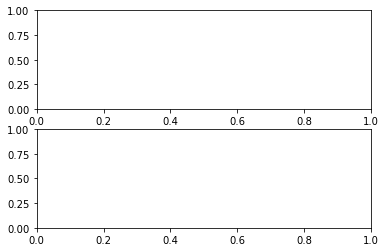

In [3]:
# plot sine signals

fig, ax = plt.subplots(2,1)
ax[0].plot(...)
ax[0].grid()
ax[0].set_xlabel('n')
ax[0].set_ylabel('$s_{1}[n]$', rotation=60)

ax[1].plot(...)
ax[1].grid()
ax[1].set_xlabel('n')
ax[1].set_ylabel('$s_{2}[n]$', rotation=60)

In [ ]:
# carry out some operation on signals e.g. addition of two signals for instance
k3, k4 =  5, 50 

s3 = ... # note the amplitudes

# plot
...

Here the Amplitudes `A` differ in the mixture of the signals. It can be seen that the amplitudes of the two signals are added together across `n`.

Implement both DFT and iDFT as functions.

In [ ]:
# DFT
def DFT(x):
    """
    input: signal x[n] in time domain
    output: X(f) in frequency domain
    """
    N = len(...)
    n = np.arange(...)
    F = ...   # hint: use np.outer(n,n) for the basis vectors
    return np.dot(...)


# inverse DFT
def iDFT(X):
    """
    input: signal X(f) in frequency domain
    output: x[n] in time domain
    """
    N = len(...)
    n = np.arange(0,N)
    IF = ...   # hint: use np.outer(n,n) for the basis vectors
    return np.dot(...)

In [ ]:
# application on signals generated above

S1 = DFT(...)
S2 = DFT(...)
S3 = DFT(...)

TypeError: float() argument must be a string or a number, not 'ellipsis'

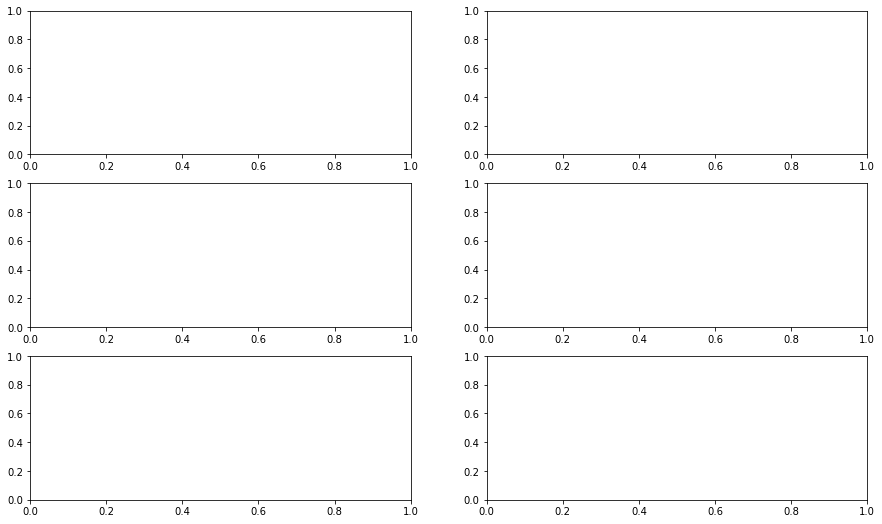

In [4]:
# plots

fig, ax = plt.subplots(3, 2, figsize=(15,9))
ax[0, 0].plot(...)
ax[0, 0].grid()
ax[0, 0].set_title('Amplitude')

ax[0, 1].plot(...)
ax[0, 1].grid()
ax[0, 1].set_title('Phase')


ax[1, 0].plot(...)
ax[1, 0].grid()
ax[1, 0].set_title('Amplitude')

ax[1, 1].plot(...)
ax[1, 1].grid()
ax[1, 1].set_title('Phase')


ax[2, 0].plot(...)
ax[2, 0].grid()
ax[2, 0].set_title('Amplitude')

ax[2, 1].plot(...)
ax[2, 1].grid()
ax[2, 1].set_title('Phase')

plt.tight_layout()



When time domain signal e.g x[n], is converted into frequency domain X(f) via DFT, the resulting output is a complex. i.e. it has both amplitude and phase which are two parts of the spectrum of the signal. Oftentimes, signals may have the same amplitude spectrum but a different phase spectrum as in sine and cosine signal.

It is also worth noting, because there are both positive and negative frequencies, the amplitude spectrum is plotted symmetrically and a special function numpy.fft.fftshift() should be used. Furthermore, to account for numerical errors, one should remove values < 1e-8 from the phase plots.

In [ ]:
# plots 

...

#### We can apply `iDFT()` already implemented above to change back from frequency to time domain.

In [ ]:
s3_recovered = np.real(iDFT(S3))

# plot

...

## 2 - Convolution

The convolution operation in signal processing expresses the amount of overlap of one signal shifted over another. As notation, we adopt commonly used representations such as `y[n]` as result or output of convolution, `x[n]` as the signal and `h[n]` as impulse response of the system in which `x[n]` is fed into.

#### In this part, we will only implement linear convolutions of discrete signals as discussed in the lecture.

Note: There exist `linear` and `circular` convolutions, but for sake of this tutorial, we will focus on implementing linear convolution. You are encouraged to look up on circular convolution on their own free will.

You are also encouraged to use the hints provided to solve the task. Please note, this implementation is not optimized for run time, hence more time efficient implementations exist as that of [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) and [scipy.signal.convolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html)

$$y[n] = x[n] * h[n] = \sum_{k = - \infty}^{\infty} x[k] . h[n - k] $$

In the following code cell, write a function to compute linear convolution `lin_convolution(x, h)` that takes two inputs; signal `x[n]` and impulse response `h[n]` and computes and returns the convolved signal `y[n]`. In this case, we will also only explore the mode where one of the signals slide over the other completely, i.e., `mode = full` in [np.convolve(mode='full')](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) implementations.

The following animations below will be used to illustrate the modes of the convolution. One shows the digital and one the continous convolution.

Sources 
- [Digital signal](https://e2eml.school/convolution_one_d.html)
- [Continous signal](https://commons.wikimedia.org/wiki/File:Convolution_of_box_signal_with_itself2.gif)


#### With this, you are encouraged to further the implementation to achieve the other results as in `mode = same` and `mode = valid` as in Numpy

![Convolution digital signal](convolution_anime.gif "digital signal")

![Convolution continous signal](convolution_of_box_signal_with_itself2.gif "continous signal")

In [ ]:
def lin_convolution(x, h, overlap=bool):
    # determine the size of convolution output
    N = ...
    
    # initialize array of zeros for the output signal
    y = np.zeros(...)
    
    # determine number of zeros required to pad both `x[t]` and `h[t]`, i and j respectively
    i,j = ..., ...
    
    # zero-pad x[t] and h[t] to the same size
    x_padded = ...
    h_padded = ...

    
    for n in range(N):
        for k in range(N):
            if n >= k:
                 y[n] += ...
    
                    
    return y

Next, we will test `lin_convolution(x, h)` with some signals and compare the results with that of numpy implementation.

For sake of uniformity, we will take `x[n]` = [0, 1, 2, 1] and `h_[t]` = [2, 2, 1, 1].

We would expect our function to return `y[n]` = [2, 6, 5, 5, 4, 1, 1] which is the same as using `np.convolve(x, h, mode = 'full')`. 

After we confirmed our funtion is working properly, we can then try out other various signals of various lengths.

In [ ]:
# test cells for the `lin_convolution()`

x = [1, 2, 0, 1]
h = [2, 2, 1, 1]

y = ...  # call the written function here on x and h 

y_np = np.convolve(x, h, mode = 'full')

In [ ]:
# plots

# For adequate visualization of results, we will use the stem plot from matplotlib 

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].stem(...)
ax[0].set_title('Implemented linear convolution')
ax[0].set_xlabel('n')
ax[0].set_ylabel('y[n]', rotation=60)
ax[0].grid()

ax[1].stem(...)
ax[1].set_title('Numpy implementation')
ax[1].set_xlabel('n')
ax[1].set_ylabel('$y_{np}[n]$', rotation=60)
ax[1].grid()
plt.tight_layout()

### Conclusions

We explored Discrete Fourier Transform (DFT) and convolution theorem in this tutorial. You are encouraged to look out other use cases to cement your understanding of those concepts. Below are some bonus tasks for your practice.

## Bonus tasks

These tasks are given for more hands-on engagement of students. There will be no solutions or grading (i.e., they are only for students to explore for leisure).


1. Show that the convolution operation fulfills the following properties
 - Commutative i.e., $\quad x[n] * h[n] \quad = \quad h[n] * x[n]$ 

 - Associative i.e., $\quad (x_{1}[n] * h[n]) \quad * x_{2}[n] \quad = \quad x_{1}[n] \quad * (h[n] * x_{2}[n])$
 
 - Derrivative i.e., $\quad y[n] = x[n] * h[n]$
 
 $\quad\quad\quad\quad\quad\quad$ $\frac{dy[n]}{dn} \quad = \quad \frac{dx[n]}{dn} * h[n] \quad = \quad x[n] * \frac{dh[n]}{dn} $.



2. Show that convolution in time domain is same as multiplication in frequency domain
 
 $$x[n] * h[n] = iDFT\left( X[k] . H[k]\right)$$
 
 where `x[n]` and `h[n]` and signal `x` and impulse `h` in time domain
 
     and `X[k]` and `H[k]` are the spectral domain of `x` and `h` respectively.


     
3. Let $x[n] = \sum\limits_{k\in \{10, 50, 100, 150, 200\}} \cos(2\pi \frac{k}{N} .n)$ with $n \in [0, 999]$ and sampling frequency $f_s = 500$Hz. 

> Plot $x[n]$, its frequency spectrum $|X(f)|$, and $\angle X(f)$. 